# Monday: Resampling methods 

**Motivation**

* Bias: the inabillity of the model to capture the intracasies of a system due to being not flexible enough.
* Variance: sensitiviy of coefficient towards errors or variation in the data. The model's parameters will vary from one training set to the next.
* irreducible errors: measurement errors that cannot be predicted.

&rarr; what method optimizes bias and variance?

**Validation Set Approach**

&rarr; split the data into training data and test data. Validation is done on the test data as validation on the training data would give too optimistic data. 

* Test error &rarr; gives an indication of how well the model will do on future data.
* Training error &rarr; how well the model fits the data. NOT a substitute for test error.

The test error is often computed as the Mean Squared Error (MSE), by iteratively splitting the data in training and test sets we rebuild the model and estimate the variance of the error.
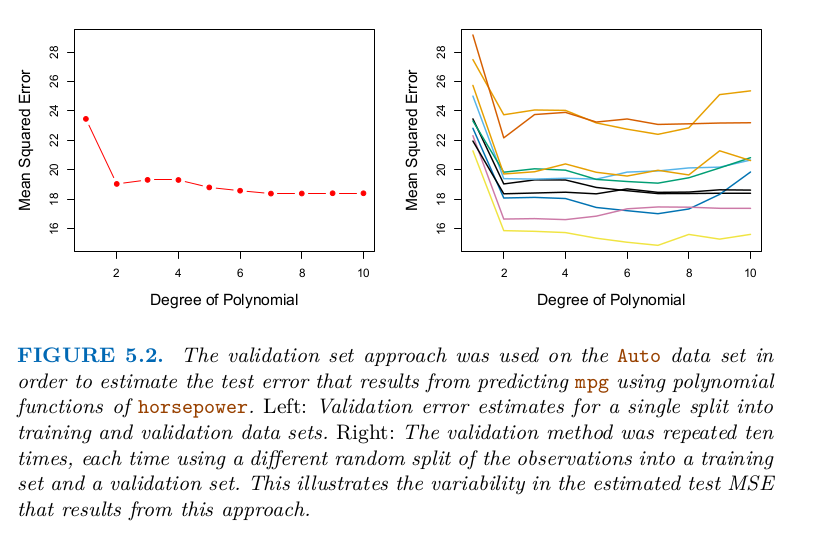

**Leave-One-Out Cross-Validation (LOOCV)**

* leave out a single observation for validation (unbiased) this is iterated for n points in the data each time rebuilding the model. The $\large MSE_{1,2, n}$ is calculated each time and in the end the average test error is calculated.
* Aproach is less biased, as we rebuild the model n times on n -1 datapoints. We test the model on the whole dataset instead just a portion.
* Overestimates the test error as much as the Validation Set Aproach.
* will always yield in the same average MSE as we use all the data. No randomness due to split.
* is unbiased as the training data is all the data except one observation. However this leads to higher variance when build using another dataset. The fact that uses such a large fraction for training thus has its compromises. 
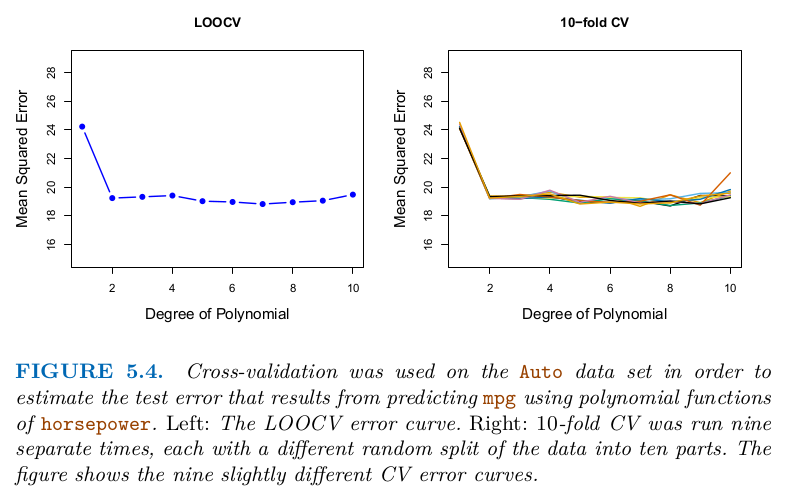

**K-fold Cross-validation**

* similar to LOOCV but divides the data into K groups and with k-1 trainingdata groups and k validation set. Again we iterate K times and rebuild the model and test on the validation group.
* the MSE is typically biased upward as the dataset is always reduced, LOOCV minimizes this at the cost of variance.
* K-folf-CV improves the bias-variance tradeoff by compromising between LOOCV and Validation Set Approach.

  



**Cross validation: Wrong & Right**

problem: *Say we want to build a predictive model on a dataset with 5000 features, 50 samples. We want to select the 100 best predictors so look at the correlation with the response and pick the best 100 and discard the rest. We asses model performance using cross-validation*

&rarr; this approach is wrong as it fools the cross-validation step as we have used all the data in the filtering process hence, there is not testdata when cross-validating, we underestimate our model.

&rarr; the correct way is to split the data before filtering and select the best predictors from the trainingdata and crossvalidate on the testdata. 

**The bootstrap**

Say we want to invest in X and the remaining fraction in Y so that we minimize the total risk of our investment. 

$$\Large \hat{\alpha}={\frac{\hat{\sigma}_{Y}^{2}-\hat{\sigma}_{X Y}}{\hat{\sigma}_{X}^{2}+\hat{\sigma}_{Y}^{2}-2\hat{\sigma}_{X Y}}}.$$

If we would similute this on test data we could for each simulation calculate a value for alpha based on the variance and covariance calculated from the data. 

Say our sample mean over all 1000 simulations is 0.5996 and our standard error is 0.083 (which is the deviation you expect each iteration). 

&rarr; In the real world we only have one sample. How do we quantify uncertainty ?

Boostrap mimics the mentioned process by resampling from the data **with replacement** meaning samples can occur more than once. for each iteration we can calculate the $\hat{\alpha}$ and $SE_B(\hat{\alpha})$. 

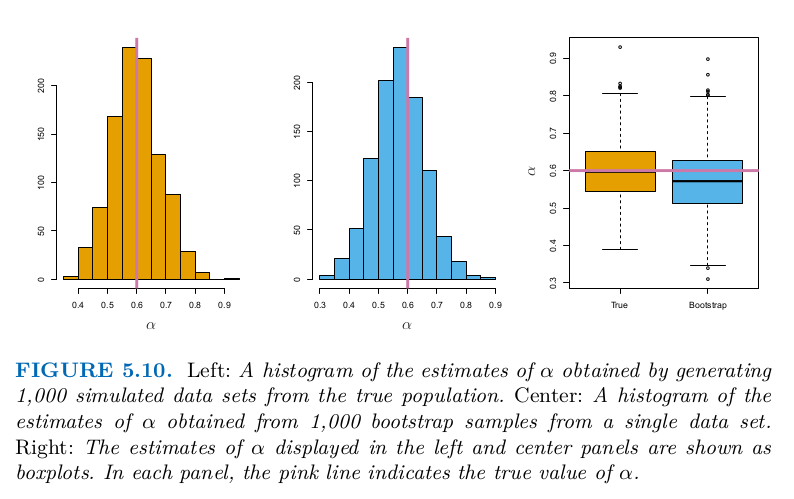


&rarr; bootstrapping is especially powerful as it does not depend on assumptions about the data like e.g. linear regression SE($\beta_k$). These procedures assume normality for estimating variance parameters and test statistics. Bootstrapping can thus be used even when these assumptions aren't met or as another test.

# Questions

**a) Spot the mistake: k-fold cross-validation is implemented by taking
the set of n observations and randomly splitting into k nonoverlapping
groups. Each of these groups acts as a validation set and the
remainder as a training set. The test error is estimated by taking the
largest of the k resulting MSE estimates**

&rarr; the test error is calculated by averaging all the test error otherwise you would over estimate the test error.

**b) What are the (dis)advantages of LOOCV compared to a validation
set approach**

&rarr; LOOCV is computationally more taxing as it is an iterative approach, hence when n=1 million it needs to do n iterations. However it has less biased as its uses almost the entire dataset for training at the cost of variance. 

&rarr; K-fold CV compromises by splitting the data into K sets of which K-1 is for training and the remainder is for testing. It is thus more biased however has less variance. 

**Suppose that we obtain a bootstrap sample from a set of observations**

* What is the probability that the first bootstrap observation is not the
jth observation from the original sample?

&rarr; the probability of being selected is $\frac{1}{n}$ so the probability of not being selected is $1 - \frac{1}{n}$.

* What is the probability that the second bootstrap observation is not
the jth observation from the original sample?

&rarr; each new draw the probability of not being the jth observation decreases $(1 - \frac{1}{n})^n$.
